# **1. Perkenalan Dataset**

Dataset yang digunakan adalah **Online Shoppers Purchasing Intention Dataset** yang 
diperoleh dari **UCI Machine Learning Repository**. Dataset ini berisi data perilaku 
pengguna website e-commerce, seperti jumlah halaman yang dikunjungi, durasi kunjungan, 
tipe pengunjung, serta informasi kontekstual lainnya.

Tujuan penggunaan dataset ini adalah untuk membangun **model klasifikasi** yang dapat 
memprediksi apakah seorang pengguna akan melakukan pembelian (`Revenue = TRUE`) atau 
tidak (`Revenue = FALSE`) berdasarkan perilaku navigasi mereka.

Sumber Dataset : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

# **2. Import Library**

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# **3. Memuat Dataset**

In [81]:
df = pd.read_csv("../online_shoppers_intention_raw.csv")

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [82]:
df.shape

(12330, 18)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [84]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# **4. Exploratory Data Analysis (EDA)**

## Target Variable

In [85]:
df["Revenue"].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [86]:
df["Revenue"].value_counts(normalize=True) * 100

Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64

Distribusi target menunjukkan bahwa sebagian besar sesi tidak menghasilkan transaksi (sekitar 85%), sementara sisanya menghasilkan transaksi (sekitar 15%).

Kondisi ini mengindikasikan adanya class imbalance ringan yang perlu diperhatikan pada tahap modeling.

## Tipe Data & Kategori

In [87]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [88]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns

numerical_cols, categorical_cols

(Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
        'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
       dtype='object'),
 Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object'))

## Missing Value Check

In [89]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Distribusi Fitur Numerik

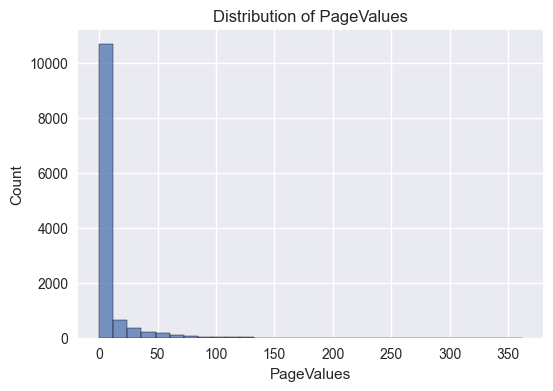

In [90]:
plt.figure(figsize=(6,4))
sns.histplot(df["PageValues"], bins=30)
plt.title("Distribution of PageValues")
plt.show()

Distribusi PageValues menunjukkan bahwa sebagian besar sesi memiliki nilai rendah, 
namun terdapat outlier dengan nilai tinggi yang berpotensi berkontribusi besar terhadap Revenue.

## Analisis Kategorikal

### VisitorType vs Revenue

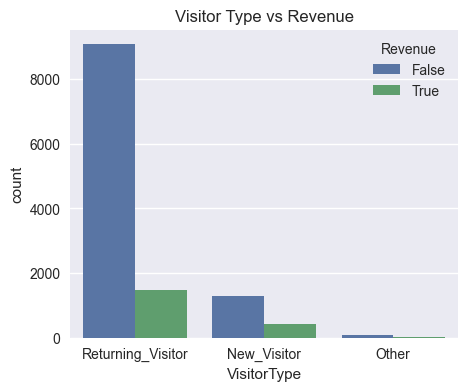

In [91]:
plt.figure(figsize=(5,4))
sns.countplot(x="VisitorType", hue="Revenue", data=df)
plt.title("Visitor Type vs Revenue")
plt.show()

Pengunjung bertipe Returning_Visitor memiliki kecenderungan lebih tinggi untuk menghasilkan transaksi.

### Weekend vs Revenue

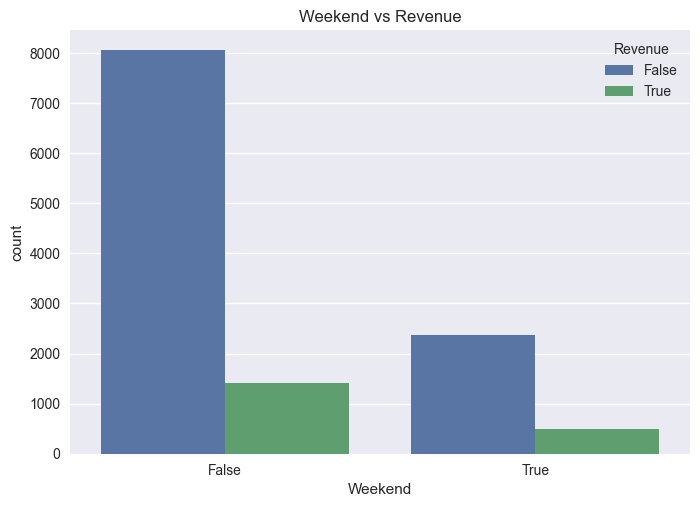

In [92]:
sns.countplot(x="Weekend", hue="Revenue", data=df)
plt.title("Weekend vs Revenue")
plt.show()

### Month vs Revenue

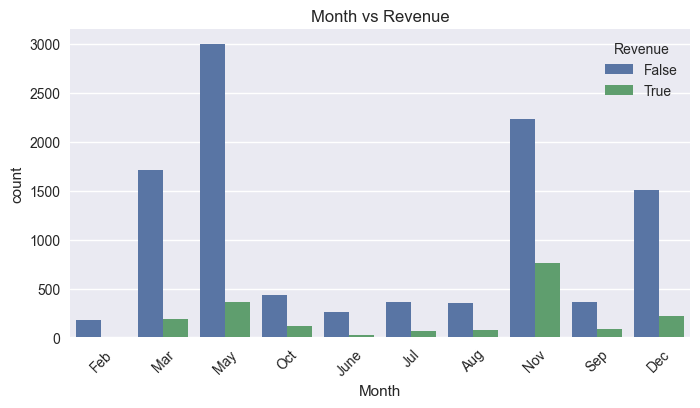

In [93]:
plt.figure(figsize=(8,4))
sns.countplot(x="Month", hue="Revenue", data=df)
plt.xticks(rotation=45)
plt.title("Month vs Revenue")
plt.show()

## Korelasi Numerik

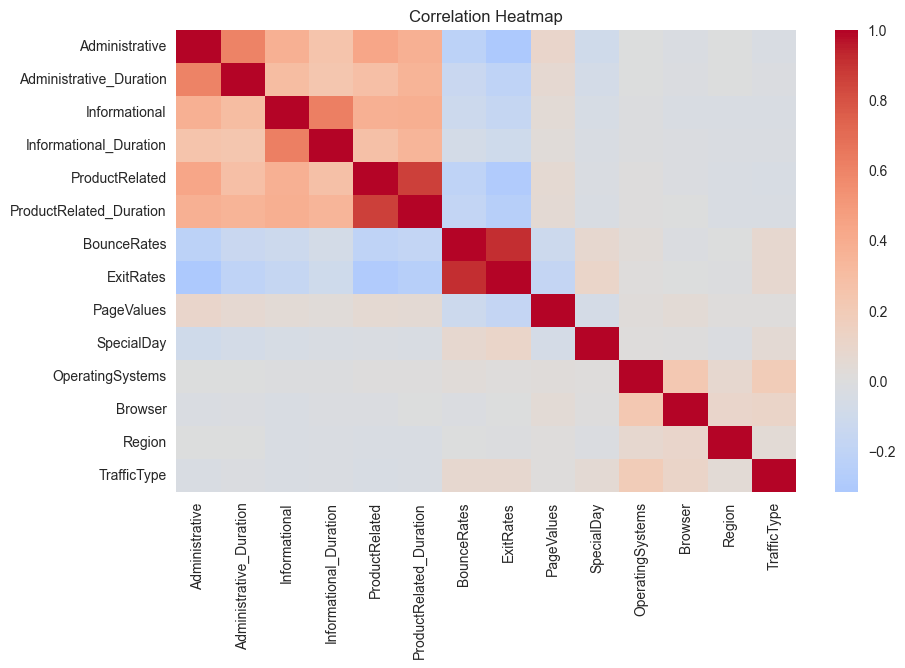

In [94]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini dilakukan beberapa langkah preprocessing, antara lain:
- Konversi tipe data boolean dan target ke bentuk numerik
- Pemisahan fitur dan target
- Encoding fitur kategorikal menggunakan One-Hot Encoding
- Standardisasi fitur numerik menggunakan StandardScaler
- Pembagian data menjadi data latih dan data uji dengan stratifikasi target

Langkah-langkah ini akan digunakan kembali pada file otomatisasi preprocessing.

In [95]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [96]:
df_prep = df.copy()

df_prep["Weekend"] = df_prep["Weekend"].astype(int)
df_prep["Revenue"] = df_prep["Revenue"].astype(int)

df_prep.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [97]:
X = df_prep.drop(columns=["Revenue"])
y = df_prep["Revenue"]

X.shape, y.shape

((12330, 17), (12330,))

In [98]:
categorical_cols = [
    "Month",
    "VisitorType"
]

boolean_cols = [
    "Weekend"
]

numerical_cols = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType"
]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (9864, 17)
Test size : (2466, 17)


In [100]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("bool", "passthrough", boolean_cols),
    ]
)

In [101]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("X_train_processed:", X_train_processed.shape)
print("X_test_processed :", X_test_processed.shape)

X_train_processed: (9864, 28)
X_test_processed : (2466, 28)


In [102]:
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(
    X_train_processed,
    columns=feature_names
)
X_train_df["Revenue"] = y_train.values

X_test_df = pd.DataFrame(
    X_test_processed,
    columns=feature_names
)
X_test_df["Revenue"] = y_test.values

In [103]:
OUTPUT_DIR = "online_shoppers_intention_preprocessing"
os.makedirs(OUTPUT_DIR, exist_ok=True)

train_path = os.path.join(
    OUTPUT_DIR,
    "online_shoppers_train_preprocessed.csv"
)

test_path = os.path.join(
    OUTPUT_DIR,
    "online_shoppers_test_preprocessed.csv"
)

X_train_df.to_csv(train_path, index=False)
X_test_df.to_csv(test_path, index=False)

print("Saved files:")
print(train_path)
print(test_path)

Saved files:
online_shoppers_intention_preprocessing\online_shoppers_train_preprocessed.csv
online_shoppers_intention_preprocessing\online_shoppers_test_preprocessed.csv
